Clothing_Categorization

Parker Williamson
1/22/2018

This program takes a set of training data and classification data and using different methods of computer vision categorizes the test set based on the training set. The data that was used to analyze different techniques was clothing data from https://www.kaggle.com/zalando-research/fashionmnist.

(used https://www.youtube.com/watch?list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&time_continue=1493&v=mynJtLhhcXk as a template for CNN)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import os
import sys
from numpy import genfromtxt
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from scipy import stats 

In [2]:
%matplotlib inline

Dictionary definitions shows the true categories that the dataset lists

In [3]:
definitions = {0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}

open data from the adjacent rawData folder

In [4]:
#reset directory using next line
#os.chdir('C:/Users/Parker/Documents/2018/SpringBoard/clothingCategorization/DataWrangling')

abspath = os.path.abspath(os.curdir)
print(abspath)
os.chdir("..")
path = os.path.abspath(os.curdir)
print(path)

C:\Users\Parker\Documents\2018\SpringBoard\clothingCategorization\DataWrangling
C:\Users\Parker\Documents\2018\SpringBoard\clothingCategorization


In [6]:
train_data = genfromtxt('rawData/fashion-mnist_train.csv', skip_header=True, delimiter=',')

In [7]:
test_data = genfromtxt('rawData/fashion-mnist_test.csv', skip_header=True, delimiter=',')

In [8]:
os.chdir(abspath)
print(abspath)

C:\Users\Parker\Documents\2018\SpringBoard\clothingCategorization\DataWrangling


In [9]:
#plt.imshow(train_data[6][1:785].reshape((28,28)))
#plt.show()

In [10]:
classification,rawData =np.split(train_data,indices_or_sections=[1],axis=1)

In [11]:
#plt.hist(rawData[0][:],range=(0,255),bins=25)
#plt.show()

Type:  T-shirt/top


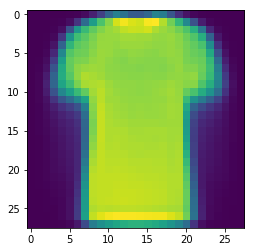

Type:  Trouser


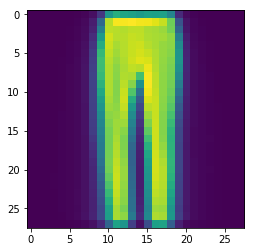

Type:  Pullover


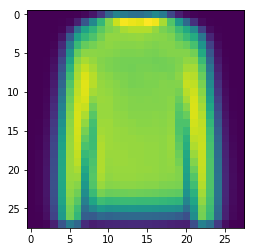

Type:  Dress


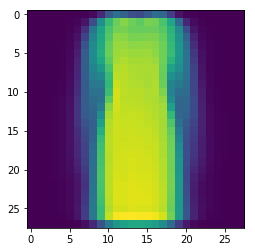

Type:  Coat


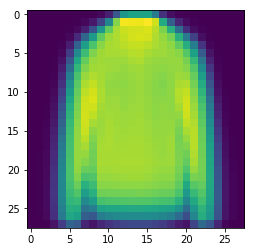

Type:  Sandal


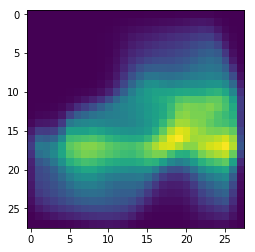

Type:  Shirt


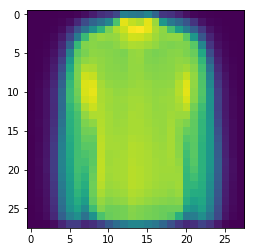

Type:  Sneaker


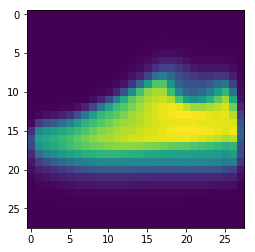

Type:  Bag


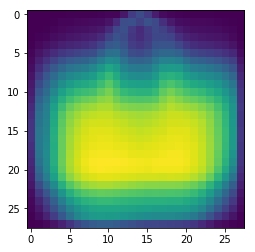

Type:  Ankle boot


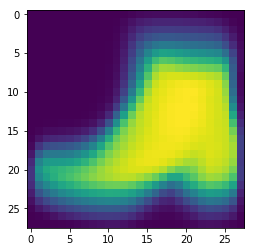

In [12]:
netImage = np.zeros((10,784))
for category in range(10):
    netImage[category,:] = np.sum(rawData[classification.ravel()==category],axis=0).ravel()
    print('Type: ',definitions[category])
    plt.imshow(netImage[category][0:784].reshape((28,28)))
    plt.show()

(256,)
Type:  T-shirt/top


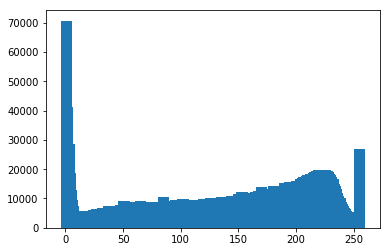

(256,)
Type:  Trouser


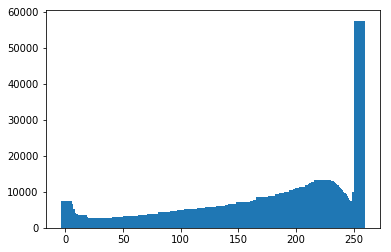

(256,)
Type:  Pullover


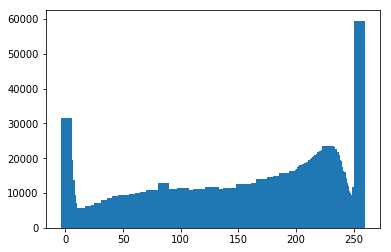

(256,)
Type:  Dress


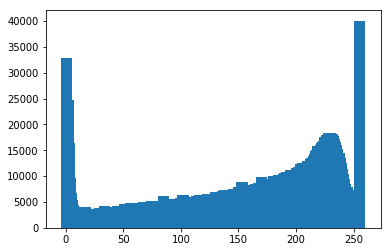

(256,)
Type:  Coat


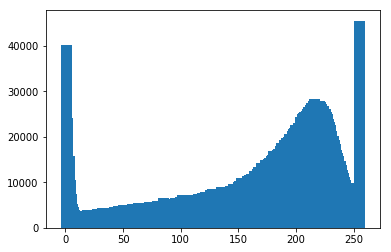

(256,)
Type:  Sandal


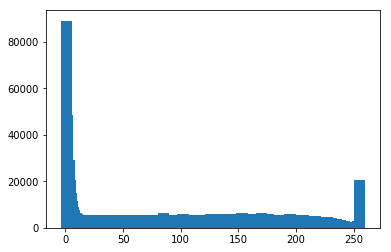

(256,)
Type:  Shirt


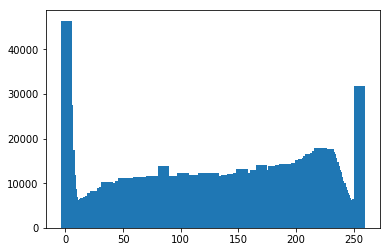

(256,)
Type:  Sneaker


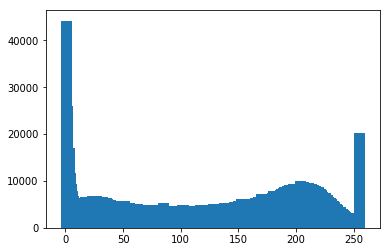

(256,)
Type:  Bag


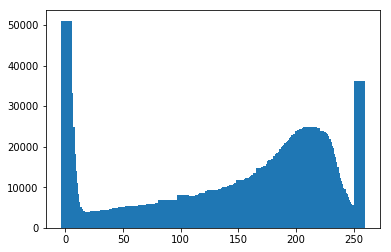

(256,)
Type:  Ankle boot


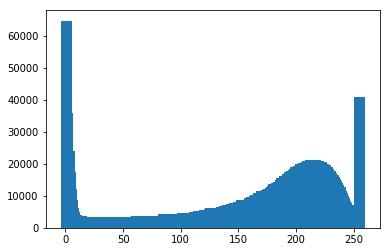

In [13]:
netHist = np.zeros((10,256))
for category in range(10):
    places, count =  np.unique(rawData[classification.ravel()==category], return_counts=True)
    #print(count)
    netHist[category,:] = count
    print(np.shape(netHist[category][:].ravel()))
    print('Type: ',definitions[category])
    plt.bar(range(1,256),netHist[category][1:256].ravel(),align='center',width=10)
    plt.show()

Select preprocessing mode

In [32]:
mode=''

In [33]:
if mode=='Normalize':
    preclassifier_data = rawData.astype('float32')/255 #preprocessing.normalize(rawData)
elif mode=='Standardize':
    preclassifier_data = (rawData - np.mean(rawData, axis=1, keepdims=1)) / np.std(rawData, axis=1, keepdims=1)
else:
    preclassifier_data = rawData

index 37204:change 1.367901579835129e-05


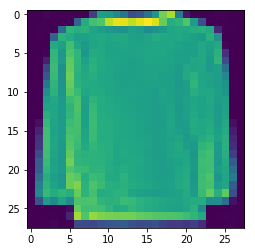

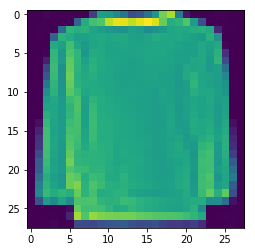

In [23]:
#find biggest difference between normalized and normal image (absolute change in one dirrection)
max_delta = 0
max_delta_ind = 0
for image in range(int(len(rawData))):
    delta = abs(sum((rawData[image][0:785]/255)-preclassifier_data[image][0:785]))
    if delta>max_delta:
        max_delta_ind = image
        max_delta = delta
        
    #print(abs(sum(rawData[image][0:785]-preclassifier_data[image][0:785])))
    
print('index {}:change {}'.format(max_delta_ind,max_delta))

plt.imshow(rawData[max_delta_ind][0:785].reshape((28,28)))
plt.show()
plt.imshow(preclassifier_data[max_delta_ind][0:785].reshape((28,28)))
plt.show()

Select classifer that is desired

In [24]:
classifier= 'MLP'

In [25]:
print('classifier: {}'.format(classifier))
if classifier=='MLP':
    clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(784, 100, 100), random_state=1)
    clf.fit(preclassifier_data, classification.ravel())
#SVC should be run with mode=='Normalize'
elif classifier=='SVC':
    clf = svm.LinearSVC()
    clf.fit(preclassifier_data, classification.ravel())
elif classifier=='LogReg':
    clf = LogisticRegression()
    clf.fit(preclassifier_data, classification.ravel())

classifier: MLP


In [34]:
classification_test,rawData_test =np.split(test_data,indices_or_sections=[1],axis=1)

In [35]:
if mode=='Normalize':
    preclassifier_data_test = rawData_test.astype('float32')/255 #preprocessing.normalize(rawData_test)
elif mode=='Standardize':
    preclassifier_data_test = (rawData_test - np.mean(rawData_test, axis=1, keepdims=1)) / np.std(rawData_test, axis=1, keepdims=1)
else:
    preclassifier_data_test = rawData_test

In [28]:
results = clf.predict(preclassifier_data_test)

In [29]:
print(results)
print(len(results))
print(len(classification_test))

[ 0.  1.  2. ...,  8.  8.  1.]
10000
10000


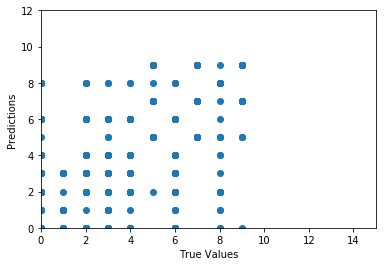

In [30]:
## The line / model
#%pylab inline
plt.scatter(classification_test, results)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis([0, 15, 0, 12])
plt.show()

In [31]:
comp= np.equal(list(classification_test.ravel()), list(results))
#print(comp.shape)
#print(classification_test.ravel())
#print(results)
print(comp)
print(comp.sum())
print('Percentage: {}'.format(100*(comp.sum()/(len(comp)))))

[ True  True  True ...,  True  True  True]
8980
Percentage: 89.8


In [36]:
#https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
#(x_train y_train), (x_test, y_test) = mnist.load_data()
x_train = preclassifier_data
y_train = classification.ravel()
x_test = preclassifier_data_test
y_test = classification_test.ravel()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#x_train /= 255
#x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 499s 8ms/step - loss: 1.5070 - acc: 0.7265 - val_loss: 0.3658 - val_acc: 0.8697
Epoch 2/12
60000/60000 [==============================] - 565s 9ms/step - loss: 0.4406 - acc: 0.8463 - val_loss: 0.3021 - val_acc: 0.8905
Epoch 3/12
60000/60000 [==============================] - 558s 9ms/step - loss: 0.3587 - acc: 0.8745 - val_loss: 0.2780 - val_acc: 0.9015
Epoch 4/12
60000/60000 [==============================] - 552s 9ms/step - loss: 0.3164 - acc: 0.8880 - val_loss: 0.2580 - val_acc: 0.9084
Epoch 5/12
60000/60000 [==============================] - 550s 9ms/step - loss: 0.2881 - acc: 0.8979 - val_loss: 0.2457 - val_acc: 0.9139
Epoch 6/12
60000/60000 [==============================] - 540s 9ms/step - loss: 0.2684 - acc: 0.9047 - val_loss: 0.2348 - val_acc: 0.9199
Epoch 7/12
60000/60000 [=========================